## Lies `heights-weights.csv` in einen DataFrame

In [51]:
import pandas as pd

heights_weights = pd.read_csv("heights-weights.csv")
heights_weights.head()

,Height,Weight,Sex
0,179.227959,82.184853,male
1,161.272583,72.826430,female
2,163.369726,61.739943,female
3,156.540166,50.427042,female
4,155.050350,51.338797,female


## Visualisiere die Verteilung von `Height` getrennt nach `Sex`

<AxesSubplot:xlabel='Height', ylabel='Density'>

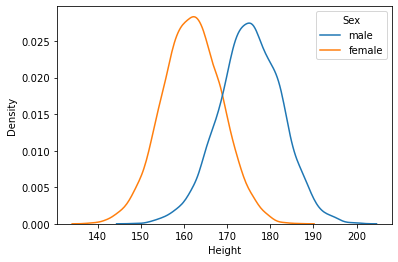

In [52]:
import seaborn as sns

sns.kdeplot(data=heights_weights,x="Height",hue="Sex")

## Data Cleaning

Entferne alle `NaN` Werte folgendermaßen:
* entferne alle Observations, bei denen das Geschlecht unbekannt ist
* ergänze numerische Features mit einem Mittelwert des jeweiligen Geschlechts

In [53]:
heights_weights = heights_weights.dropna(subset=["Sex"])
heights_weights["Weight"] = heights_weights.groupby("Sex")["Weight"].apply(lambda x: x.fillna(x.mean()))
heights_weights["Height"] = heights_weights.groupby("Sex")["Height"].apply(lambda x: x.fillna(x.mean()))



## Training

* verwende 20% Testdaten und `random_state=42`
* predicte `Height`. Dabei sind zwei verschiedene Vorgangsweisen zu implementieren und zu vergleichen:
    1. mit Hilfe einer einfachen linearen Regression ist `Height` **nur** aus `Weight` zu predicten
    2. neben `Weight` ist auch `Sex` zu verwenden.

In [54]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

sex_dummies = pd.get_dummies(heights_weights["Sex"],drop_first=True)
heights_weights = heights_weights.drop(["Sex"],axis=1)
heights_weights = pd.concat([heights_weights,sex_dummies],axis=1)

X_1 = heights_weights["Weight"]
X_2 = heights_weights.drop(["Height"],axis=1)
y = heights_weights["Height"]

# Workaround for 2d array requirement
X_1 = X_1.values.reshape(-1,1)

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y, test_size=0.2, random_state=42)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y, test_size=0.2, random_state=42)

model1 = linear_model.LinearRegression()
model1.fit(X_1_train, y_1_train)

model2 = linear_model.LinearRegression()
model2.fit(X_2_train, y_2_train)


LinearRegression()

## Evaluierung (nur das Modell mit beiden Features)

* Stelle die Verteilung der Fehler in einem `distplot` dar
* Predicte deine eigenen Daten

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

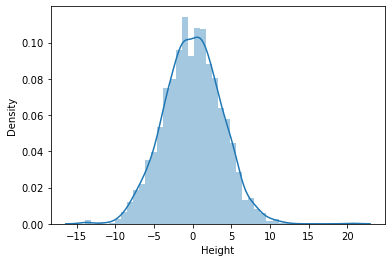

In [55]:
import seaborn as sns
fehler = y_2_test - model2.predict(X_2_test)
sns.distplot(fehler)

In [61]:
model2.predict([[58.0,1.0]])

array([156.98348419])